In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

# infected to death
See https://www.imperial.ac.uk/media/imperial-college/medicine/mrc-gida/2020-03-30-COVID19-Report-13.pdf We have, mean and cov $Gamma(5.1, 0.86)$ (incubation period) and $Gamma(18.8, 0.45)$ (onset-to-death).

In [2]:
def gamma_mu_cov_to_shape_scale(mu, cov):
    shape = 1/(cov**2)
    scale = mu * (cov**2)
    return shape, scale

Binned As [-1.   0.   1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5
 41.5 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5 53.5 54.5
 55.5 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5]
Expectation: 23.84245029857717
True Mean: 23.8993552099586
Delay Prob: [0.00000000e+00 1.57929968e-06 3.03625924e-05 1.86457459e-04
 6.24590779e-04 1.55150623e-03 3.09734032e-03 5.36262328e-03
 8.32870378e-03 1.19147929e-02 1.60226626e-02 2.03275221e-02
 2.47660993e-02 2.90561446e-02 3.30410847e-02 3.65631120e-02
 3.95431615e-02 4.19373576e-02 4.35748356e-02 4.46156497e-02
 4.49519182e-02 4.47437175e-02 4.39696271e-02 4.27410432e-02
 4.11788378e-02 3.92831999e-02 3.71043781e-02 3.48662769e-02
 3.24709575e-02 3.00531720e-02 2.76470311e-02 2.52315256e-02
 2.29904215e-02 2.07827385e-02 1.87207070e-02 1.67529218e-02
 1.49637977e-02 1.32906187e-02 1.1

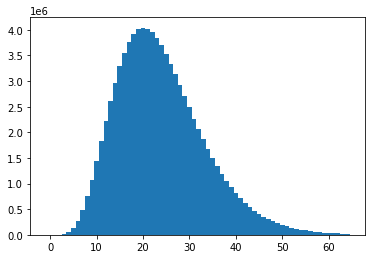

In [3]:
nRVs= int(9e7)
shp1, scl1 = gamma_mu_cov_to_shape_scale(5.1, 0.86)
shp2, scl2 = gamma_mu_cov_to_shape_scale(18.8, 0.45)
samples = np.random.gamma(shape=shp1, scale=scl1, size=nRVs) + np.random.gamma(shape=shp2, scale=scl2, size=nRVs)
bins = np.arange(-1, 65.0)
bins[2:] += 0.5
print(f"Binned As {bins}")

n, _, _ = plt.hist(samples, bins);
delay_prob = n / np.sum(n)
print(f"Expectation: {np.sum([(i) * delay_prob[i] for i in range(64)])}")
print(f"True Mean: {np.mean(samples)}")
print(f"Delay Prob: {delay_prob}")

# infected to confirmed
See https://www.imperial.ac.uk/media/imperial-college/medicine/mrc-gida/2020-03-30-COVID19-Report-13.pdf We have, mean and cov $Gamma(5.1, 0.86)$ (incubation period). 

Then, the symptoms to confirmation period, see https://arxiv.org/ftp/arxiv/papers/2003/2003.09320.pdf. 

"Negative binomial distribution to the data. We found that the best-fitting distribution has mean 5.25 and dispersion 1.57"

for the NB, the dispersion is exactly n (or r on wikipedia). We can then solve for p, but the numpy version seems to use 1-p.

In [ ]:
nRVs= int(9e7)
samples =  np.random.negative_binomial(1.57, (1-0.7698),size=nRVs)
bins = np.arange(0, 65.0)
bins -= 0.1
print(f"Binned As {bins}")

n, _, _ = plt.hist(samples, bins);
delay_prob = n / np.sum(n)
print(f"Expectation: {np.sum([(i) * delay_prob[i] for i in range(64)])}")
print(f"True Mean: {np.mean(samples)}")
print(f"Delay Prob: {delay_prob}")

There, add these distributions and sum.

In [ ]:
nRVs= int(9e7)
shp1, scl1 = gamma_mu_cov_to_shape_scale(5.1, 0.86)
samples = np.random.gamma(shape=shp1, scale=scl1, size=nRVs) + np.random.negative_binomial(1.57, (1-0.7698) size=nRVs)
bins = np.arange(-1, 65.0)
bins[2:] += 0.5
print(f"Binned As {bins}")

n, _, _ = plt.hist(samples, bins);
delay_prob = n / np.sum(n)
print(f"Expectation: {np.sum([(i) * delay_prob[i] for i in range(64)])}")
print(f"True Mean: {np.mean(samples)}")
print(f"Delay Prob: {delay_prob}")